In [2]:
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [73]:
# Loading the data
pickle_in = open("dataset/shrinked/X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("dataset/shrinked/y.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in.close()

# Normalizing the features
X = X / 255.0

# Converting labels to categorical
num_classes = 3  # Adjust based on your number of classes
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# Spliting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Verifying data shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (775, 250, 250, 1)
y_train shape: (775, 3)
X_val shape: (194, 250, 250, 1)
y_val shape: (194, 3)


In [75]:
# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Rei Ikonomi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 844ms/step - accuracy: 0.3524 - loss: 1.2115 - val_accuracy: 0.7113 - val_loss: 0.8892
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 853ms/step - accuracy: 0.7180 - loss: 0.6748 - val_accuracy: 0.8247 - val_loss: 0.3094
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 821ms/step - accuracy: 0.8319 - loss: 0.3526 - val_accuracy: 0.9175 - val_loss: 0.2995
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 817ms/step - accuracy: 0.9025 - loss: 0.2752 - val_accuracy: 0.9072 - val_loss: 0.3415
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 883ms/step - accuracy: 0.9158 - loss: 0.1907 - val_accuracy: 0.8814 - val_loss: 0.3315
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 824ms/step - accuracy: 0.8999 - loss: 0.2340 - val_accuracy: 0.9175 - val_loss: 0.1827
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 859ms/step - accuracy: 0.9452 - loss: 0.1411 - val_accuracy: 0.9330 - val_loss: 0.1756
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 909ms/step - accuracy: 0.9499 - loss: 0.1141 - val_accu

In [77]:
# Evaluating the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss:.4f}')
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.9715 - loss: 0.0756
Validation loss: 0.0688
Validation accuracy: 97.94%


In [78]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 248, 248, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,640,587 (158.85 MB)

 Trainable params: 13,880,195 (52.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,760,392 (105.90 MB)

In [79]:
model.save('water_bottle_classifier_cnn.h5')

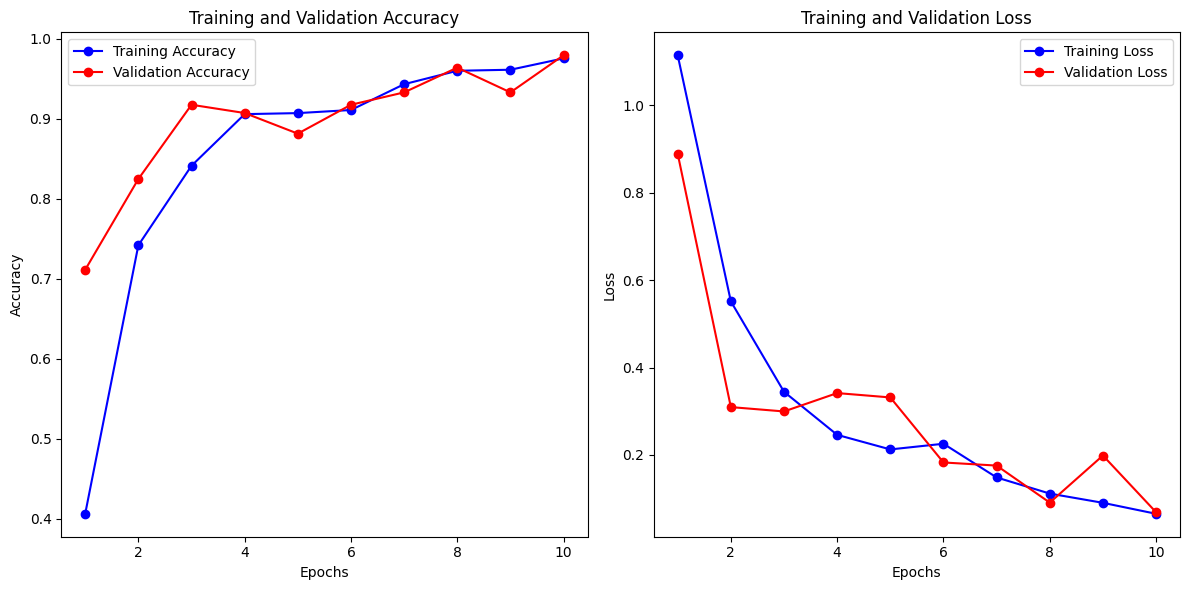

In [80]:
epochs = range(1, 11)

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
# test the model
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)

    correct = np.sum(y_pred == y_test)
    total = y_test.shape[0]

    accuracy = correct / total
    return accuracy


pickle_in = open("dataset/shrinked/X.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("dataset/shrinked/y.pickle", "rb")
y_test = pickle.load(pickle_in)
pickle_in.close()

X_test = X_test / 255.0
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

test_accuracy = test_model(model, X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step
Test accuracy: 99.28%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


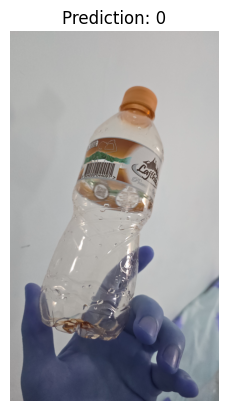

In [47]:
# testing the model by taking a random photo from this path dataset/train/
import cv2
import os

paths = ['dataset/train/tepelena/', 'dataset/train/lajthiza/', 'dataset/train/spring/']

path = np.random.choice(paths)
files = os.listdir(path)
random_file = np.random.choice(files)
img = cv2.imread(path + random_file, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (250, 250))
img = np.expand_dims(img, axis=-1)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
prediction = np.argmax(prediction, axis=1)

plt.imshow(cv2.imread(path + random_file))
plt.title(f'Prediction: {prediction[0]}')
plt.axis('off')

plt.show()


In [50]:
# now we will test the model by taking a live video from the camera
import cv2
import numpy as np

class_names = ['lajthiza', 'spring', 'tepelena']

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (250, 250))
    img = np.expand_dims(resized, axis=-1)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    prediction = model.predict(img)
    prediction = np.argmax(prediction, axis=1)

    cv2.putText(frame, f'Prediction: {class_names[prediction[0]]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━